# Taller 2 segundo corte

Un movimiento armónico con amortiguamiento viene dado por

\begin{equation}
\frac{d^{2}x}{dt^{2}} + \gamma\frac{dx}{dt} + \omega_{0}^{2}x = 0
\end{equation}

a) Encuentre el orden de esta ecuación diferencial y la función respectiva $F\left(t,x,\frac{dx}{dt}\right)$

b) Resuelva por Runge-Kutta de cuarto orden para 2 casos: amortiguamiento débil y amortiguamiento crítico. Haga las 2 gráficas respectivas.

\begin{align}
\\
F_{\text{oa}}(t,x(t),v(t)) &=-γv -\omega^{2}x
\end{align}

La ecuación diferencial dada es de segundo orden, ya que involucra la segunda derivada con respecto al tiempo.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

<ipython-input-2-db04a03a875b>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


# Movimiento armonico con amortiguamiento, con amortiguamiento debil

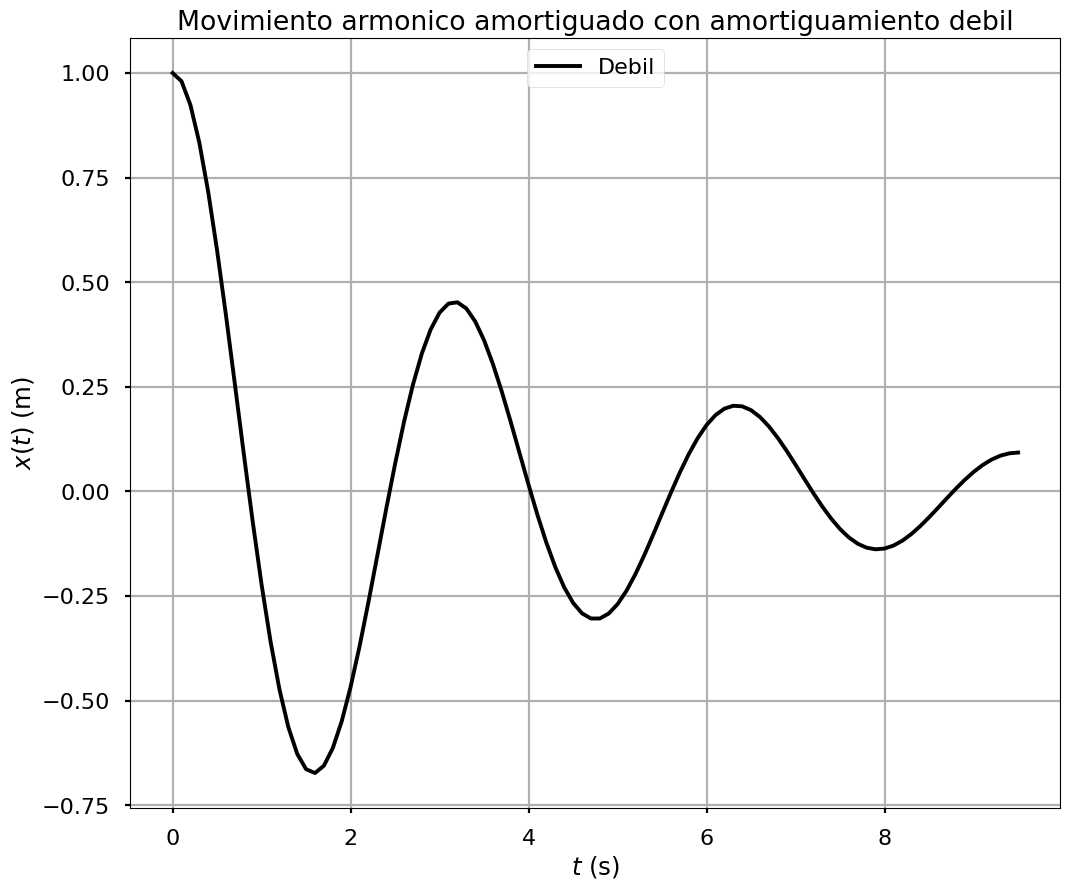

In [28]:
F = lambda t, v_oa, x_oa: -r*v_oa -pow(w,2)*x_oa

w=2
h = 0.1 # Step size
t = np.arange(0, 3*np.pi + h, h) # Numerical grid
x0_oa = 1
v0_oa = 0
r=0.5 #Coeficiente de amortiguamiento
# Initial Conditions

x_oa = np.zeros(len(t))
v_oa = np.zeros(len(t))

x_oa[0] = x0_oa
v_oa[0] = v0_oa

for i in range(0, len(t) - 1):
    k1v = h*F(t[i], v_oa[i], x_oa[i])
    k1x = h*v_oa[i]
    k2v = h*F(t[i], (v_oa[i]+(k1v/2)), x_oa[i] + (k1x/2))
    k2x = h*(v_oa[i] + (k1v/2))
    k3v = h*F(t[i], (v_oa[i]+ k2v/2) , x_oa[i] + (k2x/2))
    k3x = h*(v_oa[i] + (k2v/2))
    k4v = h*F(t[i], (v_oa[i]+k3v), x_oa[i] + k3x)
    k4x = h*(v_oa[i] + k3v)
    v_oa[i + 1] = v_oa[i] + (1/6)*(k1v + 2*k2v + 2*k3v +k4v)
    x_oa[i + 1] = x_oa[i] + (1/6)*(k1x + 2*k2x + 2*k3x +k4x)

plt.figure(figsize = (12, 10))
plt.plot(t, x_oa, 'black', label='Debil')

plt.title('Movimiento armonico amortiguado con amortiguamiento debil')
plt.xlabel('$t$ (s)')
plt.ylabel('$x(t)$ (m)')
plt.grid()
plt.legend(loc='upper center')
plt.show()

# Movimiento armonico con amortiguamiento, con amortiguamiento critico

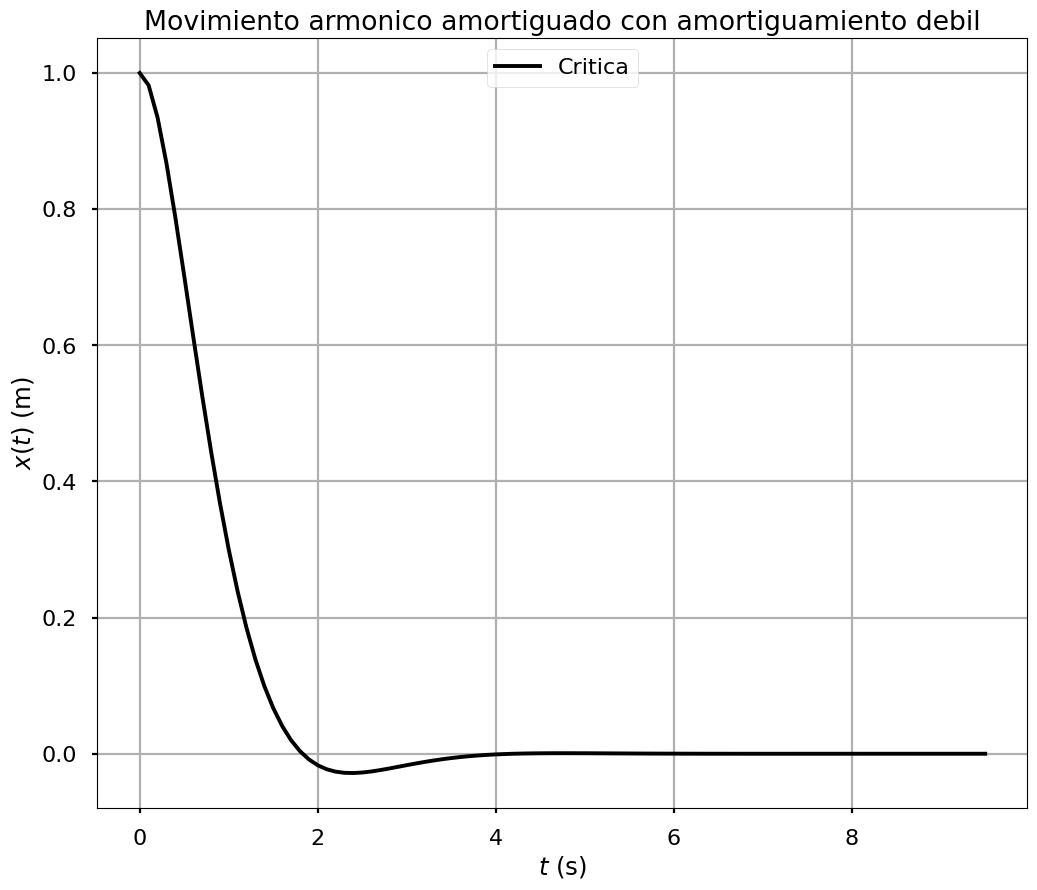

In [25]:
F = lambda t, v_oa, x_oa: -r*v_oa -pow(w,2)*x_oa

w=2
h = 0.1 # Step size
t = np.arange(0, 3*np.pi + h, h) # Numerical grid
x0_oa = 1
v0_oa = 0
r=3 #Coeficiente de amortiguamiento
# Initial Conditions

x_oa = np.zeros(len(t))
v_oa = np.zeros(len(t))

x_oa[0] = x0_oa
v_oa[0] = v0_oa

for i in range(0, len(t) - 1):
    k1v = h*F(t[i], v_oa[i], x_oa[i])
    k1x = h*v_oa[i]
    k2v = h*F(t[i], (v_oa[i]+(k1v/2)), x_oa[i] + (k1x/2))
    k2x = h*(v_oa[i] + (k1v/2))
    k3v = h*F(t[i], (v_oa[i]+ k2v/2) , x_oa[i] + (k2x/2))
    k3x = h*(v_oa[i] + (k2v/2))
    k4v = h*F(t[i], (v_oa[i]+k3v), x_oa[i] + k3x)
    k4x = h*(v_oa[i] + k3v)
    v_oa[i + 1] = v_oa[i] + (1/6)*(k1v + 2*k2v + 2*k3v +k4v)
    x_oa[i + 1] = x_oa[i] + (1/6)*(k1x + 2*k2x + 2*k3x +k4x)

plt.figure(figsize = (12, 10))
plt.plot(t, x_oa, 'black', label='Critica')

plt.title('Movimiento armonico amortiguado con amortiguamiento debil')
plt.xlabel('$t$ (s)')
plt.ylabel('$x(t)$ (m)')
plt.grid()
plt.legend(loc='upper center')
plt.show()